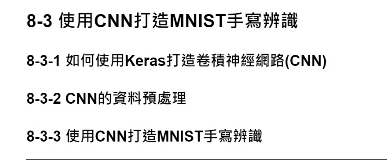
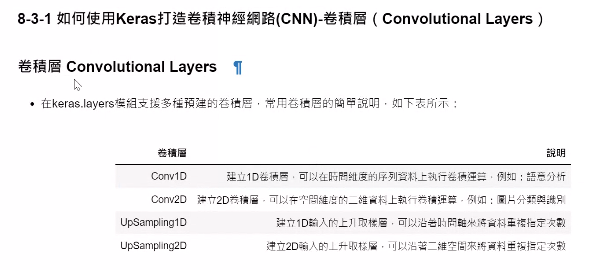
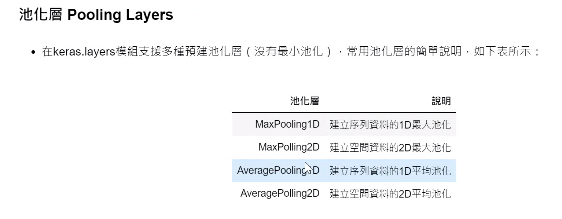
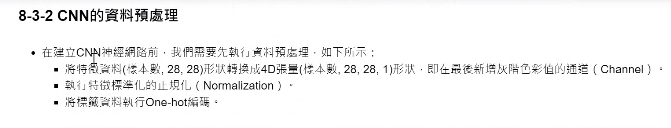

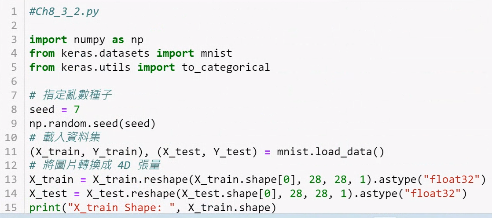
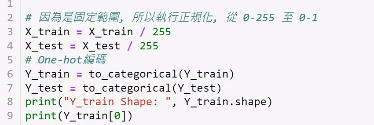

conda install tensorflow==2.0.0

conda install keras==2.3.1

In [8]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical

np.random.seed(7)

(X_train,Y_train),(X_test,Y_test)=mnist.load_data()



In [ ]:
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype("float32")
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype("float32")
X_train=X_train/255
X_test=X_test/255
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)


In [ ]:
print(X_train.shape)

In [ ]:
print(Y_train[0],Y_test[0])

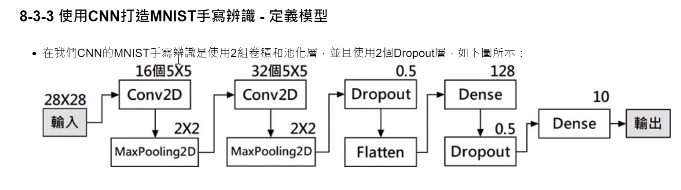

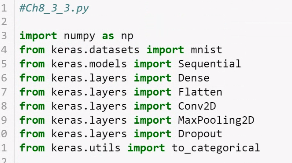
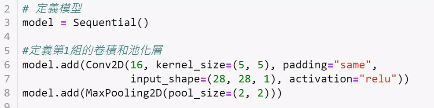
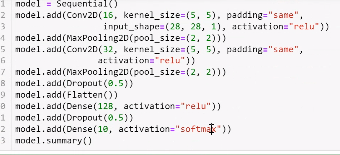
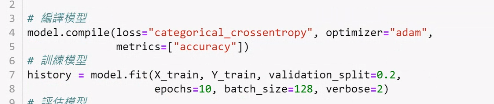


In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.utils import to_categorical

In [ ]:
model=Sequential()
model.add(Conv2D(16,kernel_size=(5,5),padding='same',
                 input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(5,5),padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer='adam',
              metrics=['accuracy'])
history=model.fit(X_train,Y_train,validation_split=0.2,
                 epochs=10,batch_size=128,verbose=2)

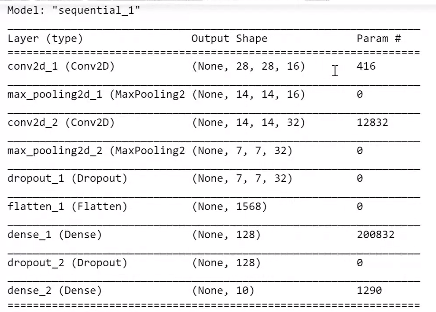
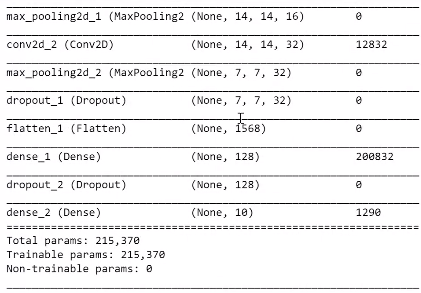
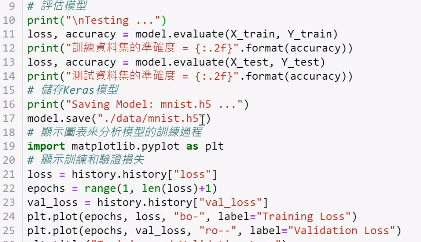
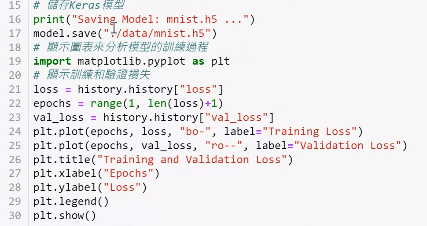

In [ ]:
loss,accuracy=model.evaluate(X_train,Y_train)
print(accuracy)
model.save('.//mnist.h5')

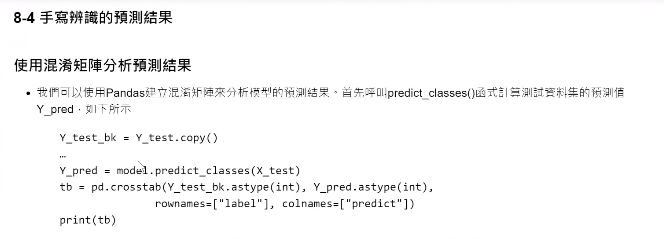
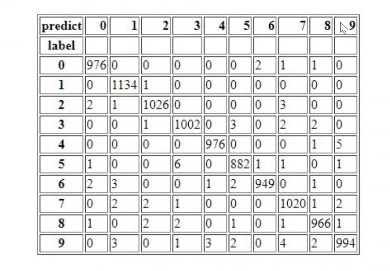

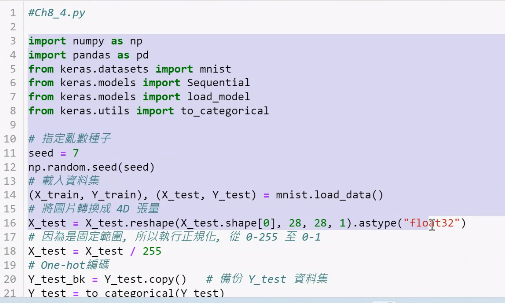


In [10]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import load_model
from keras.utils import to_categorical

np.random.seed(7)

(X_train,Y_train),(X_test,Y_test)=mnist.load_data()


In [ ]:
X_test=X_test.reshape(X_train.shape[0],28,28,1).astype("float32")
X_test=X_test/255 #正規化
Y_test_bk=Y_test.copy() #備份
Y_test=to_categorical(Y_test)


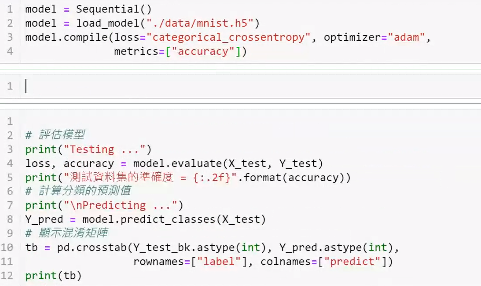

In [ ]:
model=Sequential()
model=load_model('.//mnist.h5')
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [ ]:
loss,accuracy=model.evaluate(X_train,Y_train)
print(accuracy)

In [ ]:
Y_pred=model.predict_classes(X_test)
tb=pd.crosstab(Y_test_bk.astype(int),Y_pred.astype(int),
              rownames=['label'],colnames=['predict'])

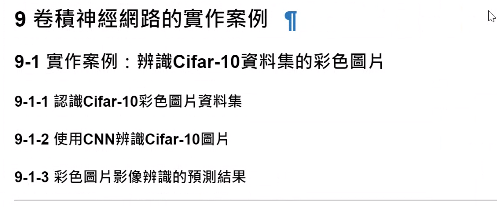

       https://www.cs.toronto.edu/~kriz/cifar.html

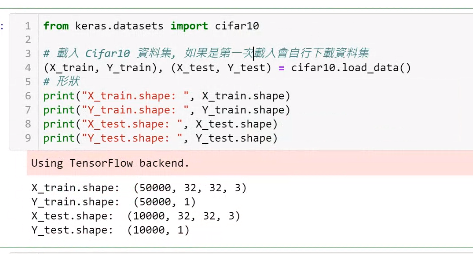   

In [ ]:
from keras.datasets import cifar10

(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()

In [ ]:
print(X_train.shape)
print(X_train[0])
print(Y_train[:10])


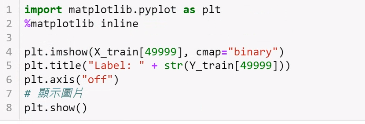

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(X_train[49999],cmap='binary')
plt.title('label:'+str(Y_train[49999]))
plt.axis('off')
plt.show()


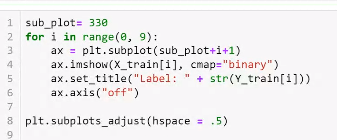

In [ ]:
sub_plot=330
for i in range(0,9):
    ax=plt.subplot(sub_plot+i+1)
    ax.imshow(X_train[i],cmap='binary')
    ax.set_title('label:'+str(Y_train[i]))
    plt.axis('off')

plt.subplots_adjust(hspace=.5)
plt.show()

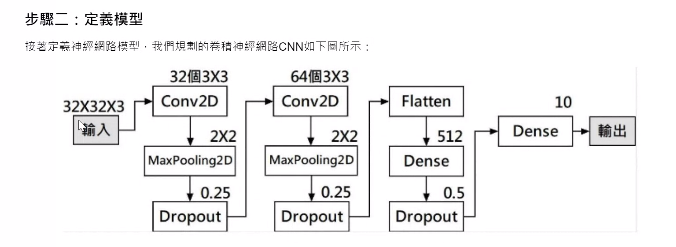

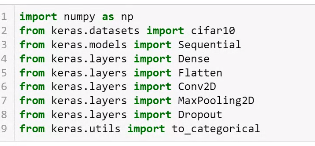
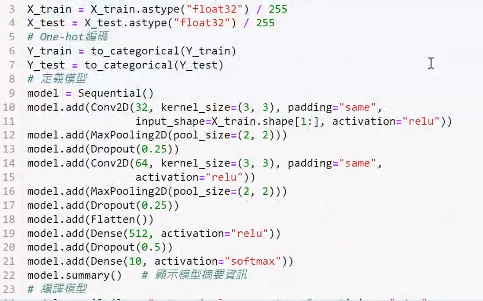
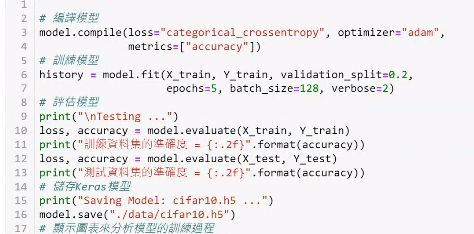

In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.utils import to_categorical

In [ ]:
X_train=X_train.astype("float32")/255
X_test=X_test.astype("float32")/255

Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)

In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='same',
                 input_shape=X_train.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer='adam',
              metrics=['accuracy'])
history=model.fix(X_train,Y_train,validation_split=0.2,
                 epochs=5,batch_size=128,verbose=2)

In [ ]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)
model.save('.//cifar10.h5')

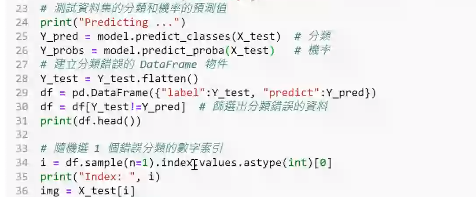
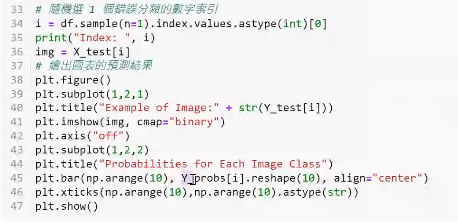

In [ ]:
(_,_),(_,Y_test)=cifar10.load_data()
#n=100
plt.figure()
plt.subplot(1,2,1)
plt.title('Example of image:'+str(Y_test[0]))
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()

probs=model.predict_proba(X_test)
plt.subplot(1,2,2)
plt.title('probabilities for each image class')
plt.bar(np.arange(10),probs.reshape(10),align='center')
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()

    HW

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(7)

(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype("float32")
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype("float32")
X_train=X_train/255
X_test=X_test/255
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)

In [ ]:
model=Sequential()
model.add(Conv2D(16,kernel_size=(5,5),padding='same',
                 input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(5,5),padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history=model.fit(X_train,Y_train,validation_split=0.2,epochs=10,batch_size=128,verbose=2)

In [ ]:
Y_pred = model.predict_classes(X_test)
tb = pd.crosstab(Y_test.astype(int).flatten(), 
                 Y_pred.astype(int),
                 rownames=["label"], colnames=["predict"])
print(tb)

In [ ]:
print("Predicting ...")
Y_pred = model.predict_classes(X_test)
Y_probs = model.predict_proba(X_test)
Y_test=Y_test.flatten()
df=pd.DataFeame({"label":Y_test,"predict":Y_pred})
df=df[Y_test!=Y_pred]
print(df.head())

i=df.sample(n=1).index.values.astype(int)[0]
print("Index:",i)
img=X_test[i]

plt.figure()
plt.subplot(1,2,1)
plt.title("Label:" + str(Y_test[i]))
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Probabilities for Each Image Class")
plt.bar(np.arange(10),Y_probs[i].reshape(10),align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()